In [83]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import shapely

df_meteorologia = pd.read_csv("../dados/Dados Meteorologicos - Finalizado.csv")

In [84]:
df_meteorologia[50:]

,index,valorMedida,codEstacao,municipio,uf,nomeEstacao,latitude,longitude
50,2015-01-03 02:00:00,0.0,410690203A,CURITIBA,PR,Vista Alegre,-49.30100,-25.4130
51,2015-01-03 03:00:00,0.0,410690203A,CURITIBA,PR,Vista Alegre,-49.30100,-25.4130
52,2015-01-03 04:00:00,0.0,410690203A,CURITIBA,PR,Vista Alegre,-49.30100,-25.4130
53,2015-01-03 05:00:00,0.0,410690203A,CURITIBA,PR,Vista Alegre,-49.30100,-25.4130
54,2015-01-03 06:00:00,0.0,410690203A,CURITIBA,PR,Vista Alegre,-49.30100,-25.4130
...,...,...,...,...,...,...,...,...
269676,2017-12-19 22:00:00,0.0,410690202A,CURITIBA,PR,CEI Romário Martins,-49.25527,-25.3536
269677,2017-12-19 23:00:00,0.0,410690202A,CURITIBA,PR,CEI Romário Martins,-49.25527,-25.3536
269678,2017-12-20 00:00:00,0.0,410690202A,CURITIBA,PR,CEI Romário Martins,-49.25527,-25.3536
269679,2017-12-20 01:00:00,0.0,410690202A,CURITIBA,PR,CEI Romário Martins,-49.25527,-25.3536


In [77]:
df_meteorologia["latitude"] = df_meteorologia["latitude"].round(2)
df_meteorologia["longitude"] = df_meteorologia["longitude"].round(2)

In [85]:
#Leitura hexagonos

df_places = gpd.read_file('../dados/hex8_data_geometry_curitiba3.geojson')
df_places["latitude"] = df_places.centroid.x
df_places["longitude"] = df_places.centroid.y

/var/folders/ld/8dhf4gy93xbd1ybmf6nljm38dn1p1r/T/ipykernel_72839/3945906694.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_places["latitude"] = df_places.centroid.x
/var/folders/ld/8dhf4gy93xbd1ybmf6nljm38dn1p1r/T/ipykernel_72839/3945906694.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_places["longitude"] = df_places.centroid.y


In [67]:
df_places[:5]

,date,score,hex,NOME,geometry,latitude,longitude
0,2020-05-18,100,88a831acc7fffff,BAIRRO NOVO,"POLYGON ((-49.27456 -25.53764, -49.27041 -25.5...",-49.275416,-25.533110
1,2020-03-11,100,88a831ace1fffff,BAIRRO NOVO,"POLYGON ((-49.25623 -25.53586, -49.25208 -25.5...",-49.257088,-25.531334
2,2020-04-01,100,88a831acebfffff,BAIRRO NOVO,"POLYGON ((-49.26539 -25.53675, -49.26124 -25.5...",-49.266252,-25.532222
3,2020-07-12,100,88a831acc5fffff,BAIRRO NOVO,"POLYGON ((-49.26869 -25.54399, -49.26454 -25.5...",-49.269547,-25.539459
4,2020-04-25,99,88a831acedfffff,BAIRRO NOVO,"POLYGON ((-49.25036 -25.54221, -49.24621 -25.5...",-49.251219,-25.537683


In [78]:
df_places["latitude"] = df_places["latitude"].round(2)
df_places["longitude"] = df_places["longitude"].round(2)

In [86]:

df_meteorologia = df_meteorologia.rename(columns={'index': 'dataHora'})

In [87]:
gdf = gpd.GeoDataFrame(
    df_meteorologia, geometry=gpd.points_from_xy(df_meteorologia.latitude, df_meteorologia.longitude))
gdf = gdf.set_crs(df_places.crs)
print(gdf.crs)

epsg:4326


In [81]:
df_merged = df_places.merge(df_meteorologia, on=["longitude", "latitude"])

In [93]:
df_merged.valorMedida.isna

<bound method Series.isna of 0         0.2
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
642811    0.0
642812    0.0
642813    0.0
642814    0.0
642815    0.0
Name: valorMedida, Length: 642816, dtype: float64>

<AxesSubplot: >

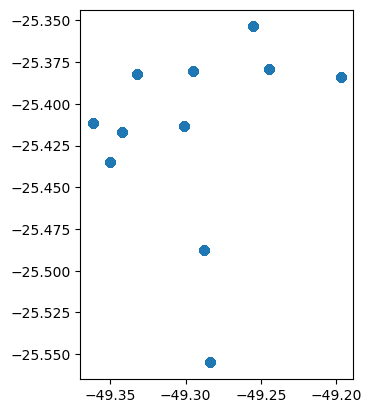

In [88]:
gdf.plot()

In [89]:
gdf[:5]

,dataHora,valorMedida,codEstacao,municipio,uf,nomeEstacao,latitude,longitude,geometry
0,2015-01-01 00:00:00,0.0,410690203A,CURITIBA,PR,Vista Alegre,-49.301,-25.413,POINT (-49.30100 -25.41300)
1,2015-01-01 01:00:00,0.0,410690203A,CURITIBA,PR,Vista Alegre,-49.301,-25.413,POINT (-49.30100 -25.41300)
2,2015-01-01 02:00:00,0.2,410690203A,CURITIBA,PR,Vista Alegre,-49.301,-25.413,POINT (-49.30100 -25.41300)
3,2015-01-01 03:00:00,0.0,410690203A,CURITIBA,PR,Vista Alegre,-49.301,-25.413,POINT (-49.30100 -25.41300)
4,2015-01-01 04:00:00,0.0,410690203A,CURITIBA,PR,Vista Alegre,-49.301,-25.413,POINT (-49.30100 -25.41300)


In [ ]:
df_places